In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('data/spirals.csv')

In [3]:
data.head()

,x,y,xy,sinx,siny,x2,y2,label
0,0.500000,0.500000,0.250000,0.938000,0.938000,0.250000,0.250000,0.0
1,0.509999,0.500150,0.255076,0.979264,0.938778,0.260099,0.250150,0.0
2,0.519991,0.500600,0.260307,0.998536,0.941081,0.270391,0.250600,0.0
3,0.529970,0.501350,0.265700,0.995437,0.944824,0.280868,0.251351,0.0
4,0.539928,0.502399,0.271259,0.970152,0.949862,0.291522,0.252404,0.0


In [4]:
# dropping the label from the dataset to get the input features
X = data.drop('label', axis=1).to_numpy()

# selecting the labels
y = data['label'].to_numpy()

In [5]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
# setting seed to get reproducible results
tf.random.set_seed(42)
np.random.seed(42)

# toy model, based on Tensorflow Playground
model = Sequential()
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train, y_train, batch_size=16, epochs=100)

In [7]:
from loop import TrainingLoop

In [8]:
# definign optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_function = tf.keras.losses.BinaryCrossentropy()

batch_size = 16
epochs = 150

log_path = 'logs/original/archimedean.csv'

In [9]:
training = TrainingLoop(model, X_train, y_train, 
                        loss_function, optimizer, 
                        validation_split=0.1, 
                        batch_size=batch_size,
                        log_file=log_path)

In [10]:
training.train(10)

	  0% | 0/45 [00:00<?, ?it/s]WARNING:tensorflow:Layer dense is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because its dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/10	Loss: 0.7005: 	100% | 45/45 [00:00<00:00, 98.41it/s]
Epoch 2/10	Loss: 0.6906: 	100% | 45/45 [00:00<00:00, 568.25it/s]
Epoch 3/10	Loss: 0.6729: 	100% | 45/45 [00:00<00:00, 708.40it/s]
Epoch 4/10	Loss: 0.6366: 	100% | 45/45 [00:00<00:00, 690.95it/s]
Epoc

In [11]:
# creating x coordinates
xx = np.linspace(4, -4, 100)
# creating y coordinates
yy = np.linspace(-4, 4, 100).T

# making a grid of these
xx, yy = np.meshgrid(xx, yy)

# giving a value to each of these
Xfull = np.c_[xx.ravel(), yy.ravel(), xx.ravel() * yy.ravel(), np.sin(xx.ravel()), 
              np.sin(yy.ravel()), xx.ravel() ** 2, yy.ravel() ** 2]

In [12]:
# testing accuracy
pred = model.predict(X_test)
accuracy_score(y_test, pred.round())

0.91

In [13]:
# predicting values in the grid
y_pred = model.predict(Xfull)

In [14]:
# reshaping the predictions
len(y_pred)
im = y_pred.reshape(100, 100)

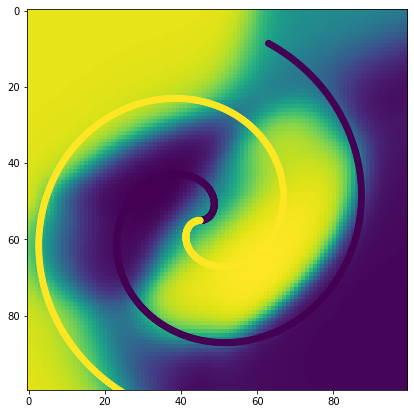

In [15]:
# plotting the original image and what the program learned with the custom trainging loop
plt.figure(figsize=(7, 7))
plt.scatter((data['x']+4)*10, 100-(data['y']+4)*10, c=data['label'], cmap='viridis')
plt.imshow(-im)